# Figure 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['svg.fonttype'] = 'none'

## Functions

In [36]:
def plot_epistasis(epistasis, ax):
    #fig, ax = plt.subplots(figsize=(2.5,1.2))
    
    # Anything smaller than 1e-8 is equal to zero.
    epistasis[epistasis<1e-7] = np.nan
    
    xs = []
    ys = []
    for i in range(len(epistasis)):
        y = np.log10(epistasis[i])
        x = np.arange(1, len(y)+1) + np.random.randn(len(y))*.1 
        xs += list(x)
        ys += list(y)
        
    ax.scatter(xs, ys, color='gray', s=4, rasterized=True)

    meanx = np.arange(1, 7)
    out = np.nanpercentile(np.log10(epistasis), (50, 2.5, 97.5), axis=0)
    ymean, ylower, yupper = out[0], abs(out[0] - out[1]), abs(out[0] - out[2])
    ax.errorbar(meanx, ymean, yerr=[ylower, yupper], color="k", fmt="o", ms=2, capsize=3, elinewidth=0.5)

    #ax.set_yscale('log')
    ax.set_ylim(ymax=2, ymin=-8)
    #ax.set_xlabel("order of epistasis")
    #ax.set_ylabel("magnitude")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    #ax.spines["bottom"].set_visible(False)
    ticks = ax.set_xticks(range(1,7))
    ax.set_yticks(range(-8,4,2))
    ax.spines["bottom"].set_bounds(1,6)

## Full state results

In [4]:
dataset = "full-state-predictions"
filepath = "generated-data/%s/results/binary-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    data = pickle.load(f)
    epistasis1 = data["epistasis"]

# Two state results

In [5]:
dataset = "two-state-predictions"
filepath = "generated-data/%s/results/binary-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    data = pickle.load(f)
    epistasis2 = data["epistasis"]

## Three state results

In [6]:
dataset = "three-state-predictions"
filepath = "generated-data/%s/results/binary-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    data = pickle.load(f)
    epistasis3 = data["epistasis"]

/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1143: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


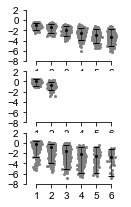

In [37]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(1.7,3.2))

gs = gridspec.GridSpec(3, 1)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0], sharex=ax1)
ax3 = plt.subplot(gs[2, 0], sharex=ax1)

plot_epistasis(epistasis1, ax1)
plot_epistasis(epistasis2, ax2)
plot_epistasis(epistasis3, ax3)

#ax2.set_xticklabels([])


In [38]:
fig.savefig("figures/fig-3a.pdf", format="pdf", dpi=600, bbox_inches="tight")